# Step 1: Install Required Libraries

In [26]:
!pip install nltk scikit-learn matplotlib seaborn wordcloud --quie

# Step 2: Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 3: Download NLTK data

In [28]:
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Initialize tokenizer

In [29]:
tokenizer = TweetTokenizer()

# Step 4: Prepare Dataset

In [30]:
data = {
    'text': [
        "I love this product!", "This is the worst thing ever.", "Absolutely fantastic!",
        "I hate it so much.", "Not bad, could be better.", "Totally awesome experience.",
        "Terrible customer service.", "Best purchase I made!", "Awful, just awful!", "Great stuff!"
    ],
    'sentiment': [1, 0, 1, 0, 0, 1, 0, 1, 0, 1]  # 1 = Positive, 0 = Negative
}
df = pd.DataFrame(data)

print("Original Data Sample:\n", df.head(), "\n")

Original Data Sample:
                             text  sentiment
0           I love this product!          1
1  This is the worst thing ever.          0
2          Absolutely fantastic!          1
3             I hate it so much.          0
4      Not bad, could be better.          0 



# Step 5: Text Preprocessing Function

In [31]:
def preprocess_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens = tokenizer.tokenize(text)  # tokenize using TweetTokenizer
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # lemmatize
    return ' '.join(tokens)

Apply preprocessing and show results

In [32]:
df['clean_text'] = df['text'].apply(preprocess_text)
print("Sample cleaned text data:\n", df[['text', 'clean_text']].head(), "\n")

Sample cleaned text data:
                             text            clean_text
0           I love this product!          love product
1  This is the worst thing ever.      worst thing ever
2          Absolutely fantastic!  absolutely fantastic
3             I hate it so much.             hate much
4      Not bad, could be better.      bad could better 



# Step 6: Vectorization using TF-IDF

In [33]:
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['clean_text'])
y = df['sentiment']

print(f"Number of features extracted: {len(tfidf.get_feature_names_out())}\n")

Number of features extracted: 24



# Step 7: Split Dataset into Train and Test sets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}\n")

Train samples: 7, Test samples: 3



# Step 8: Train Logistic Regression Model

In [35]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
print("Model training completed.\n")

Model training completed.



# Step 9: Evaluate Model on Test Data

In [36]:
y_pred = model.predict(X_test)

print("Model Accuracy on Test Set: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

Model Accuracy on Test Set: 33.33%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
    Positive       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Plot Confusion Matrix

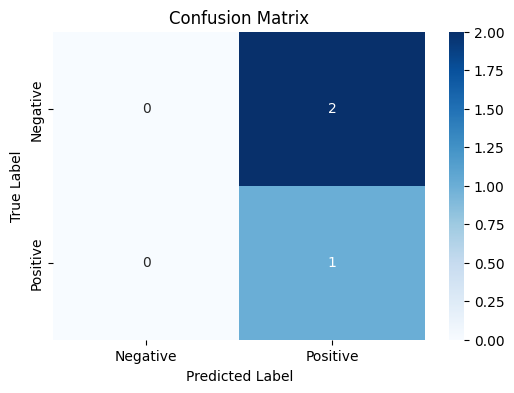

In [37]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Step 10: Display WordClouds for Positive and Negative Sentiments

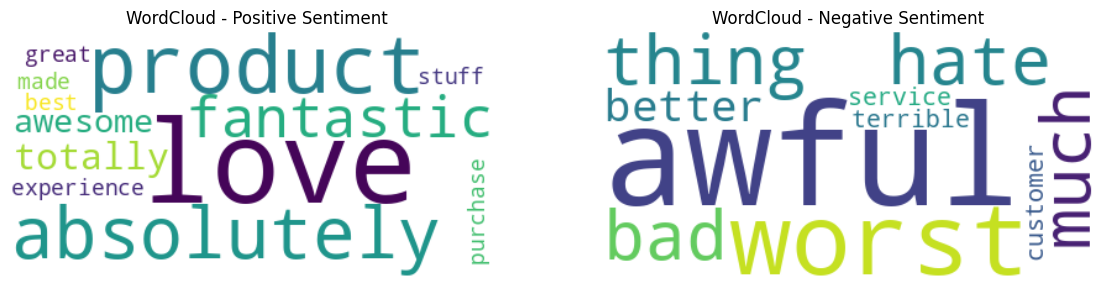

In [38]:
positive_text = ' '.join(df[df['sentiment'] == 1]['clean_text'])
negative_text = ' '.join(df[df['sentiment'] == 0]['clean_text'])

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(background_color='white', max_words=100).generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Positive Sentiment')

plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(background_color='white', max_words=100).generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Negative Sentiment')

plt.show()

# Step 11: Predict and show example predictions on test set

In [39]:
print("Sample predictions on test data:")
for text, pred in zip(df.loc[y_test.index, 'text'], y_pred):
    print(f"Text: {text} --> Predicted Sentiment: {'Positive' if pred == 1 else 'Negative'}")

Sample predictions on test data:
Text: Awful, just awful! --> Predicted Sentiment: Positive
Text: This is the worst thing ever. --> Predicted Sentiment: Positive
Text: Totally awesome experience. --> Predicted Sentiment: Positive
